In [14]:
from ultralytics import YOLO
import cv2
import numpy as np
import math
import supervision as sv
import matplotlib as plt

# **Paths for pt files and images**

In [15]:
model_path = "best.pt"
coin_path = "coin.pt"
bread_side_path="bread_side.pt"
img_path = "bread_top_with_coin_1.jpg"
coin_img_path="bread_top_with_coin_1.jpg"
coin_img_path_2="bread_side_with_coin_4.jpg"
bread_side_img_path="bread_side_with_coin_4.jpg"

In [16]:
img = cv2.imread(img_path)
#img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
coin_img=cv2.imread(coin_img_path)
#coin_img=cv2.cvtColor(coin_img,cv2.COLOR_BGR2RGB)
coin_img_2=cv2.imread(coin_img_path_2)
H, W, _ = img.shape
model = YOLO(model_path)
bread_area=[]
coin_area=0

In [17]:
img.shape

(1600, 1197, 3)

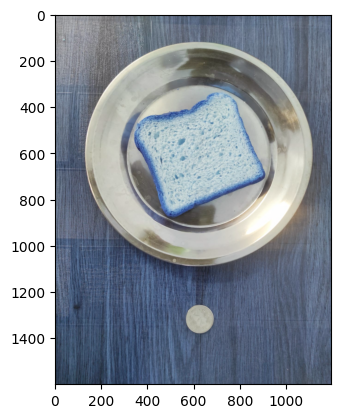

In [18]:
plt.pyplot.imshow(img)

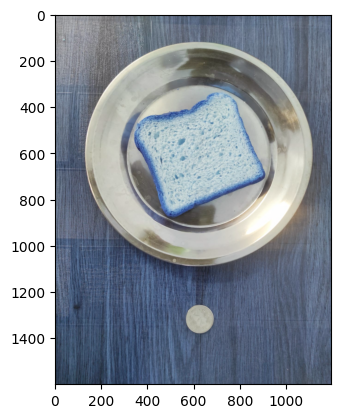

In [19]:
plt.pyplot.imshow(coin_img)

# Bread front area 

In [20]:
results = model(img)
results[0].names
font = cv2.FONT_HERSHEY_SIMPLEX


0: 640x480 1 White bread, 181.5ms
Speed: 6.0ms preprocess, 181.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


In [21]:
def draw_mask(img, pts, color, alpha=0.5):
    h, w, _ = img.shape

    overlay = img.copy()
    output = img.copy()

    cv2.fillPoly(overlay, pts, color)
    output = cv2.addWeighted(overlay, alpha, output, 1 - alpha,
                    0, output)
    return output

In [22]:
print(results[0])

ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: None
keys: ['boxes', 'masks']
masks: ultralytics.yolo.engine.results.Masks object
names: {0: 'Wheat Bread', 1: 'White bread'}
orig_img: array([[[148, 149, 153],
        [149, 150, 154],
        [150, 151, 155],
        ...,
        [ 97, 110, 136],
        [100, 113, 139],
        [100, 113, 139]],

       [[148, 149, 153],
        [149, 150, 154],
        [150, 151, 155],
        ...,
        [ 97, 110, 136],
        [ 99, 112, 138],
        [100, 113, 139]],

       [[148, 149, 153],
        [149, 150, 154],
        [150, 151, 155],
        ...,
        [ 96, 109, 135],
        [ 99, 112, 138],
        [ 99, 112, 138]],

       ...,

       [[ 37,  45,  68],
        [ 30,  38,  61],
        [ 36,  47,  69],
        ...,
        [ 77,  87, 117],
        [ 80,  90, 120],
        [ 84,  93, 126]],

       [[ 30,  38,  61],
        [ 30,  38,  61],
        [ 37,

WARNING  'Masks.segments' is deprecated. Use 'Masks.xyn' for segments (normalized) and 'Masks.xy' for segments (pixels) instead.


186438.5
[186438.5]


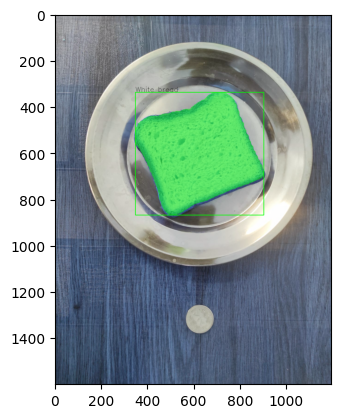

In [23]:
lab = results[0].names
color = [(0,0,255), (0,255,0),(255,0,0)]
for result in results:
    for j, mask in enumerate(result.masks.segments):
        mask[:,0]*=W
        mask[:,1]*=H
        segment = np.array(mask, dtype= np.int32)
        x,y,x2,y2 = np.array(result.boxes.xyxy.cpu(), dtype = "int")[j]
        class_ids = np.array(np.array(result.boxes.cls.cpu(), dtype = "int"))[j]
        cv2.rectangle(img, (x,y), (x2, y2), color[class_ids], 2)
        cv2.putText(img, lab[class_ids], (x,y-2), font, 1, (0,0,0))
        img = draw_mask(img,[segment] ,color[class_ids])
        area_cm = round(cv2.contourArea(segment),2)
        bread_area.append(area_cm)
        print(area_cm)

print(bread_area)
plt.pyplot.imshow(img)
#cv2.imshow('mask', img)        
#cv2.waitKey(0)

# Coin area for Bread front area


0: 640x480 1 5rs_coin, 1 silver_coin, 127.7ms
Speed: 6.1ms preprocess, 127.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


Detections(xyxy=array([[     568.53,      1258.3,      686.99,      1378.7],
       [     178.02,      467.81,      344.39,      621.53]], dtype=float32), mask=None, confidence=array([    0.92118,     0.43118], dtype=float32), class_id=array([2, 1]), tracker_id=None)
11376.69834608674


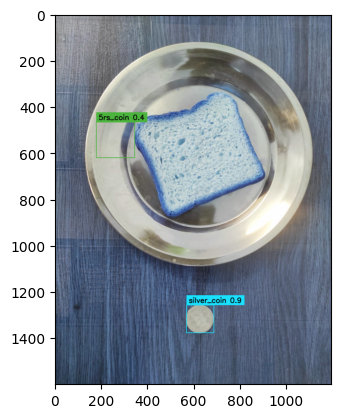

In [24]:
model_coin = YOLO(coin_path)
model_coin.conf=0.5
box_annotator = sv.BoxAnnotator(thickness=2,text_thickness=2,text_scale=1)
result_coin = model_coin(coin_img)[0]
detections = sv.Detections.from_yolov8(result_coin)
print(detections)
labels = [f"{model_coin.model.names[class_id]} {confidence:0.1f}" for xyxy, mask, confidence, class_id, tracker_id in detections]
frame = box_annotator.annotate(scene=coin_img, detections=detections, labels=labels)    

for xyxy, mask, confidence, class_id, tracker_id in detections:
    if confidence>0.5:
        coin_area=3.14*(xyxy[3]-xyxy[1])*(xyxy[3]-xyxy[1])/4
        print(coin_area)
# Coin area for Bread front area
plt.pyplot.imshow(coin_img)
#cv2.imshow('coin',img)
#cv2.waitKey(0)

In [25]:
print("actual area of bread: ")
for b_a in bread_area:
    print("AREA (in cm square): ",round((b_a*3.14*1.25*1.25)/(coin_area),3))

actual area of bread: 
AREA (in cm square):  80.402


# Bread side length

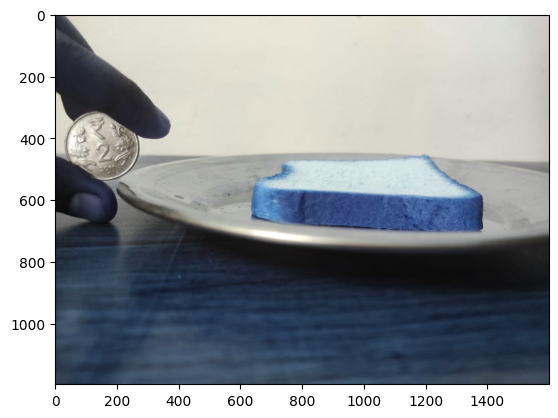

In [26]:
bread_side_img=cv2.imread(bread_side_img_path)

plt.pyplot.imshow(bread_side_img)

In [27]:
bread_side_model=YOLO(bread_side_path)

result_side=bread_side_model(bread_side_img)[0]
print(result_side)


0: 480x640 1 bread_side, 151.9ms
Speed: 5.9ms preprocess, 151.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'bread_side'}
orig_img: array([[[ 58,  57,  67],
        [ 59,  58,  68],
        [ 63,  62,  72],
        ...,
        [205, 201, 200],
        [203, 199, 198],
        [203, 199, 198]],

       [[ 60,  59,  69],
        [ 60,  59,  69],
        [ 62,  61,  71],
        ...,
        [205, 201, 200],
        [203, 199, 198],
        [203, 199, 198]],

       [[ 59,  58,  68],
        [ 58,  57,  67],
        [ 60,  59,  69],
        ...,
        [205, 201, 200],
        [203, 199, 198],
        [203, 199, 198]],

       ...,

       [[ 53,  67,  86],
        [ 53,  67,  86],
        [ 52,  66,  85],
        ...,
        [ 59,  68,  81],
        [ 57,  66,  79],
        [ 56,  65,  78]],

       [[ 47,  61,  80],
        [ 48,  62,  81],
        [ 50,  64,  83],
        ...,
        [ 60,  69,  82],
        [ 58,  67,

Detections(xyxy=array([[     635.43,      545.33,        1378,       711.5]], dtype=float32), mask=None, confidence=array([    0.81858], dtype=float32), class_id=array([0]), tracker_id=None)
BREAD HEIGHTS IN PIXELS:  [166.16577]


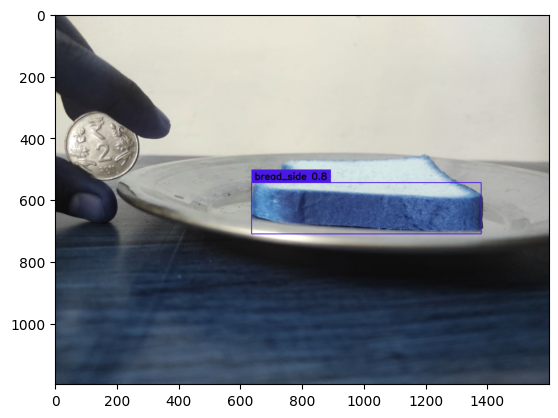

In [28]:
detections = sv.Detections.from_yolov8(result_side)
print(detections)
labels = [f"{bread_side_model.model.names[class_id]} {confidence:0.1f}" for xyxy, mask, confidence, class_id, tracker_id in detections]
frame = box_annotator.annotate(scene=bread_side_img, detections=detections, labels=labels)
bread_height=[]
for xyxy, mask, confidence, class_id, tracker_id in detections:
    bread_height.append(xyxy[3]-xyxy[1])
    
    print("BREAD HEIGHTS IN PIXELS: ",bread_height)

plt.pyplot.imshow(bread_side_img)

# Coin area for Bread side height


0: 480x640 1 silver_coin, 143.0ms
Speed: 6.0ms preprocess, 143.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Detections(xyxy=array([[     32.186,      319.18,      269.41,      540.73]], dtype=float32), mask=None, confidence=array([    0.68668], dtype=float32), class_id=array([2]), tracker_id=None)
110.77461242675781


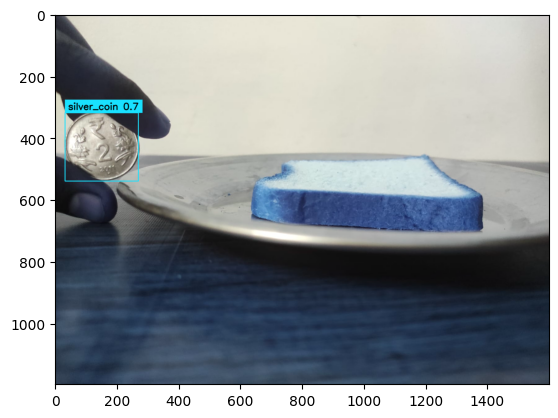

In [29]:
model_coin = YOLO(coin_path)
box_annotator = sv.BoxAnnotator(thickness=2,text_thickness=2,text_scale=1)
result_coin = model_coin(coin_img_2)[0]
detections = sv.Detections.from_yolov8(result_coin)
print(detections)
labels = [f"{model_coin.model.names[class_id]} {confidence:0.1f}" for xyxy, mask, confidence, class_id, tracker_id in detections]
frame = box_annotator.annotate(scene=coin_img_2, detections=detections, labels=labels)

coin_radius=0
for xyxy, mask, confidence, class_id, tracker_id in detections:
    coin_radius=(xyxy[3]-xyxy[1])/2
    #coin_area=3.14*(xyxy[3]-xyxy[1])*(xyxy[3]-xyxy[1])/4
    print(coin_radius)
# Coin area for Bread front area
plt.pyplot.imshow(coin_img_2)
#cv2.imshow('coin',img)
#cv2.waitKey(0)

In [30]:
print("actual height of the bread: ")
for b_h in bread_height:
    print("HEIGHT (in cm): ",(b_h/coin_radius)*(1.25))

actual height of the bread: 
HEIGHT (in cm):  1.8750434761647308


# FINAL DIMENSIONS OF BREAD

In [31]:
print("actual area of bread: ")
for b_a in bread_area:
    print("AREA (in cm square): ",round((b_a*3.14*1.25*1.25)/(coin_area),3))
    
print("actual height of the bread: ")
for b_h in bread_height:
    print("HEIGHT (in cm): ",(b_h/coin_radius)*(1.25))
    
print("The volume of each bread:")
for b_a in bread_area:
    print("VOLUME (in cm cube): ",round((b_a*3.14*1.25*1.25)/(coin_area),3)*(b_h/coin_radius)*(1.25))

actual area of bread: 
AREA (in cm square):  80.402
actual height of the bread: 
HEIGHT (in cm):  1.8750434761647308
The volume of each bread:
VOLUME (in cm cube):  150.7572455705967
